In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning
from sklearn.feature_extraction.text import CountVectorizer

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier

# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

In [ ]:
survey = pd.read_csv('Starbucks satisfactory survey.csv')
survey.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [ ]:
sb = survey.copy()

In [ ]:
sb.drop(columns=['Timestamp'], inplace = True)

In [ ]:
sb.rename({'1. Your Gender' : 'Gender', '2. Your Age' : 'Age', '3. Are you currently....?' : 'Working_Status', '4. What is your annual income?' : 'Annual_Income', '5. How often do you visit Starbucks?' : 'Visit_Duration', '6. How do you usually enjoy Starbucks?' : 'Visit_Plan', '7. How much time do you normally  spend during your visit?' : 'Spending_Time', "8. The nearest Starbucks's outlet to you is...?" : 'Outlet_Location', '9. Do you have Starbucks membership card?' : 'Member_Card', '10. What do you most frequently purchase at Starbucks?' : 'Frequent_Purchase', '11. On average, how much would you spend at Starbucks per visit?' : 'Average_Spending', '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Product_Rating', '13. How would you rate the price range at Starbucks?' : 'Price_Rating', '14. How important are sales and promotions in your purchase decision?' : 'Promotion_Rating', '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', '16. You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Hangout_Place_Rating', '19. How do you come to hear of promotions at Starbucks? Check all that apply.' : 'Promotion_Tools', '20. Will you continue buying at Starbucks?' : 'Loyal_Customer'} , inplace = True , axis = 1)

In [ ]:
sb.head()

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,Visit_Plan,Spending_Time,Outlet_Location,Member_Card,Frequent_Purchase,Average_Spending,Product_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Place_Rating,Promotion_Tools,Loyal_Customer
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
sb.isna().sum()/len(sb.index)*100

,0
Gender,0.000000
Age,0.000000
Working_Status,0.000000
Annual_Income,0.000000
Visit_Duration,0.000000
Visit_Plan,0.819672
Spending_Time,0.000000
Outlet_Location,0.000000
Member_Card,0.000000
Frequent_Purchase,0.000000


In [ ]:
sb['Visit_Plan'].unique()

array(['Dine in', 'Take away', 'Drive-thru', 'never', 'Never buy', nan,
       'I dont like coffee', 'Never', 'Never '], dtype=object)

In [ ]:
sb['Visit_Plan'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never ',], 'Never buy', inplace = True)
sb['Visit_Plan'].value_counts()

,count
Visit_Plan,
Take away,49
Dine in,46
Drive-thru,20
Never buy,6


In [ ]:
sb['Frequent_Purchase'].unique()

array(['Coffee', 'Cold drinks;Pastries', 'Coffee;Sandwiches',
       'Cold drinks', 'Coffee;Cold drinks',
       'Cold drinks;Pastries;Sandwiches',
       'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Pastries;Sandwiches',
       'Coffee;Pastries', 'Cold drinks;Juices;Pastries',
       'Coffee;Cold drinks;Pastries;Sandwiches', 'Never', 'Never buy any',
       'Jaws chip ', 'cake ', 'Pastries', 'Cold drinks;Never', 'never',
       'Nothing ', 'Coffee;Cold drinks;Juices;Pastries;Sandwiches'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvr = CountVectorizer(tokenizer = lambda x: x.split(';'))
purchase = cvr.fit_transform(sb['Frequent_Purchase'])

print(cvr.get_feature_names_out())

['cake ' 'coffee' 'cold drinks' 'jaws chip ' 'juices' 'never'
 'never buy any' 'nothing ' 'pastries' 'sandwiches']


In [ ]:
purchase_value = pd.DataFrame(purchase.toarray(), columns = cvr.get_feature_names_out())
purchase_value['Never_Buy']= purchase_value.iloc[:, -6:-3].sum(axis=1)

purchase_value.drop(columns=['never', 'never buy any', 'nothing '], inplace = True)

purchase_value.rename({'cake ' : 'Buy_Cake', 'coffee' : 'Buy_Coffee', 'cold drinks' : 'Buy_ColdDrinks', 'jaws chip ' : 'Buy_JawsChip', 'juices' : 'Buy_Juices', 'pastries' : 'Buy_Pastries', 'sandwiches' : 'Buy_Sandwiches'}, inplace = True , axis = 1)

sb = pd.concat([sb, purchase_value], axis = 1)
sb

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,Visit_Plan,Spending_Time,Outlet_Location,Member_Card,Frequent_Purchase,...,Promotion_Tools,Loyal_Customer,Buy_Cake,Buy_Coffee,Buy_ColdDrinks,Buy_JawsChip,Buy_Juices,Buy_Pastries,Buy_Sandwiches,Never_Buy
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,0,0,0,0,0,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,Social Media;In Store displays,Yes,0,0,1,0,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,In Store displays;Billboards,Yes,0,1,0,0,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,Through friends and word of mouth,No,0,1,0,0,0,0,0,0
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,0,0,0,0
118,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,1,0,1,1,1,1
119,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,Social Media;Through friends and word of mouth...,No,0,1,1,0,0,0,0,0
120,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,Social Media;Through friends and word of mouth...,Yes,0,1,0,0,0,0,0,0


In [ ]:
sb['Promotion_Tools'].unique()

array(['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)',
       'Social Media;In Store displays', 'In Store displays;Billboards',
       'Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media', 'Social Media',
       'Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth;In Store displays',
       'Starbucks Website/Apps', 'Emails', 'Social Media;Emails',
       'Through friends and word of mouth;In Store displays',
       'Social Media;In Store displays;Billboards', 'Application offer',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays',
       'In Store displays',
       'Social Media;Through friends and word of mouth;Billboards',
       'Starbucks Website/Apps;Social Me

In [ ]:
sb['Promotion_Tools'].replace([np.nan,], 'Social Media', inplace = True)

In [ ]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
promo = cvr.fit_transform(sb['Promotion_Tools'])

print(cvr.get_feature_names_out())

['application offer' 'billboards' 'deal sites (fave, iprice, etc...)'
 'emails' 'in store displays' 'never hear' 'social media'
 'starbucks website/apps' 'through friends and word of mouth']


In [ ]:
promo_value = pd.DataFrame(promo.toarray(), columns = cvr.get_feature_names_out())

promo_value.rename({'application offer' : 'Promo_AppsOffer', 'billboards' : 'Promo_Billboards', 'deal sites (fave, iprice, etc...)' : 'Promo_Sites', 'emails' : 'Promo_Emails', 'in store displays' : 'Promo_StoreDisplay', 'never hear' : 'Never_Heard', 'social media' : 'Promo_SocMed', 'starbucks website/apps' : 'Promo_SBucksApps', 'through friends and word of mouth' : 'Promo_WoM'} , inplace = True , axis = 1)

sb = pd.concat([sb, promo_value], axis = 1)

In [ ]:
sb.drop(columns=['Frequent_Purchase', 'Promotion_Tools'], inplace = True)

In [ ]:
sbucks = sb.copy()
sbucks.head()

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,Visit_Plan,Spending_Time,Outlet_Location,Member_Card,Average_Spending,...,Never_Buy,Promo_AppsOffer,Promo_Billboards,Promo_Sites,Promo_Emails,Promo_StoreDisplay,Never_Heard,Promo_SocMed,Promo_SBucksApps,Promo_WoM
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,...,0,0,0,1,1,0,0,1,1,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,...,0,0,0,0,0,1,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,...,0,0,1,0,0,1,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,...,0,0,0,0,0,0,0,0,0,1
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))])

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['Gender', 'Age', 'Working_Status', 'Annual_Income', 'Visit_Duration', 'Spending_Time', 'Outlet_Location', 'Member_Card', 'Average_Spending']),
    ('mode_onehot_pipe', mode_onehot_pipe, ['Visit_Plan']),
], remainder = 'passthrough')

In [ ]:
sbucks['Loyal_Customer'].value_counts()/sbucks.shape[0]*100

,count
Loyal_Customer,
Yes,77.04918
No,22.95082


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in sbucks:
  if sbucks[i].dtypes == 'Gender':
    sbucks[i] = label_encoder.fit_transform(sbucks[i])

In [ ]:
sbucks['Loyal_Customer'] = np.where(sbucks['Loyal_Customer'] == 'Yes', 1, 0)

In [ ]:
X = sbucks.drop('Loyal_Customer', axis = 1)
y = sbucks['Loyal_Customer']

X.shape

(122, 34)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 0)

In [ ]:
rf = RandomForestClassifier(random_state = 42)
svc = LinearSVC(random_state = 42)
grad = GradientBoostingClassifier(random_state = 42)

In [ ]:
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
svc_pipe = Pipeline([('transformer', transformer), ('svc', svc)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])


for model in [ rf_pipe,svc_pipe,grad_pipe]:
    model.fit(X_train, y_train)

score_acc = [
             accuracy_score(y_test, rf_pipe.predict(X_test)),
            accuracy_score(y_test, svc_pipe.predict(X_test)),
             accuracy_score(y_test, grad_pipe.predict(X_test))
            ]
method_name = ['Random Forest Classifier', 'LinearSVC','Gradient Boosting Classifier']

acc_summary = pd.DataFrame({'method (random state= 0)': method_name, 'accuracy score': score_acc})
acc_summary

,method (random state= 0),accuracy score
0,Random Forest Classifier,0.891892
1,LinearSVC,0.756757
2,Gradient Boosting Classifier,0.810811


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# ... (your existing code)

for model in [rf_pipe]:
    y_pred = model.predict(X_test)
    print(model.named_steps['rf'].__class__.__name__)  # Print model name
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("-" * 20)

RandomForestClassifier
Accuracy: 0.8918918918918919
Precision: 0.8787878787878788
Recall: 1.0
F1-score: 0.9354838709677419
--------------------


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# ... (your existing code)

for model in [svc_pipe]:
    y_pred = model.predict(X_test)
    print(model.named_steps['svc'].__class__.__name__)  # Print model name
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("-" * 20)

LinearSVC
Accuracy: 0.7567567567567568
Precision: 0.8571428571428571
Recall: 0.8275862068965517
F1-score: 0.8421052631578947
--------------------


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# ... (your existing code)

for model in [grad_pipe]:
    y_pred = model.predict(X_test)
    print(model.named_steps['grad'].__class__.__name__)  # Print model name
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("-" * 20)

GradientBoostingClassifier
Accuracy: 0.8108108108108109
Precision: 0.8666666666666667
Recall: 0.896551724137931
F1-score: 0.8813559322033898
--------------------


In [ ]:
# Assuming 'rf_pipe' is your fitted RandomForestClassifier pipeline
importances = rf_pipe.named_steps['rf'].feature_importances_
feature_names = rf_pipe.named_steps['transformer'].get_feature_names_out()

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)

                                              Feature  Importance
39                            remainder__Price_Rating    0.126894
38                          remainder__Product_Rating    0.084150
44                    remainder__Hangout_Place_Rating    0.079233
40                        remainder__Promotion_Rating    0.040182
29                           one hot__Member_Card_Yes    0.037983
..                                                ...         ...
49                              remainder__Buy_Juices    0.000277
15                      one hot__Visit_Duration_Daily    0.000000
22  one hot__Spending_Time_Between 2 hours to 3 hours    0.000000
58                             remainder__Never_Heard    0.000000
45                                remainder__Buy_Cake    0.000000

[62 rows x 2 columns]


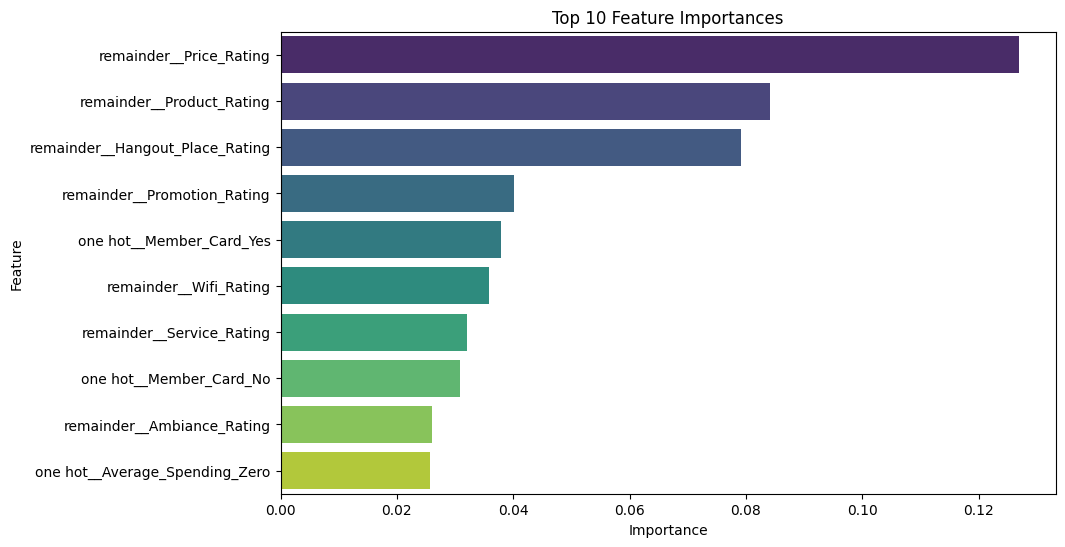

In [ ]:
# Assuming you have calculated feature importances as described in the previous response
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N features for visualization (e.g., top 10)
top_n = 10
top_features = feature_importance_df.head(top_n)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

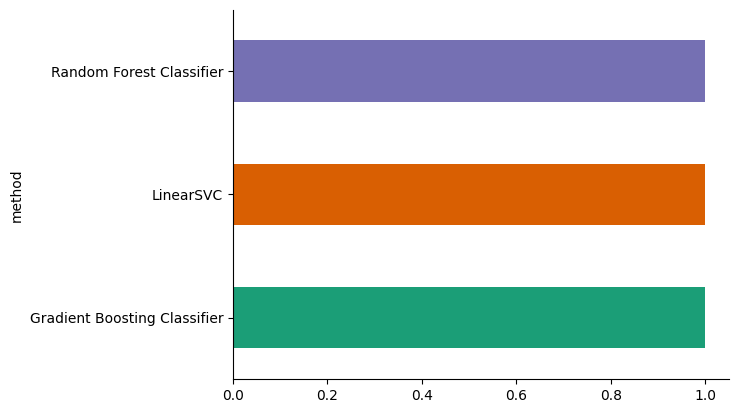

In [ ]:
# @title method

from matplotlib import pyplot as plt
import seaborn as sns
acc_summary.groupby('method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

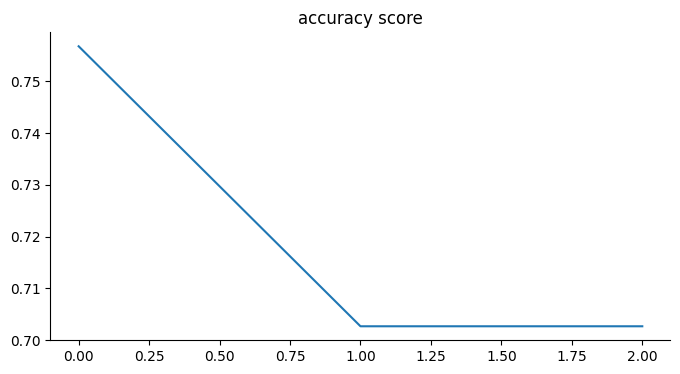

In [ ]:
# @title accuracy score

from matplotlib import pyplot as plt
acc_summary['accuracy score'].plot(kind='line', figsize=(8, 4), title='accuracy score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
rf = RandomForestClassifier(random_state = 42)
svc = LinearSVC(random_state = 42)
grad = GradientBoostingClassifier(random_state = 42)

In [ ]:
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
svc_pipe = Pipeline([('transformer', transformer), ('svc', svc)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])


for model in [ rf_pipe,svc_pipe,grad_pipe]:
    model.fit(X_train, y_train)

score_acc = [
             accuracy_score(y_test, rf_pipe.predict(X_test)),
            accuracy_score(y_test, svc_pipe.predict(X_test)),
             accuracy_score(y_test, grad_pipe.predict(X_test))
            ]
method_name = ['Random Forest Classifier', 'LinearSVC','Gradient Boosting Classifier']

acc_summary = pd.DataFrame({'method (random state = 42)': method_name, 'accuracy score': score_acc})
acc_summary

,method (random state = 42),accuracy score
0,Random Forest Classifier,0.891892
1,LinearSVC,0.756757
2,Gradient Boosting Classifier,0.810811


In [ ]:
rf = RandomForestClassifier(random_state = 3434)
svc = LinearSVC(random_state = 3434)
grad = GradientBoostingClassifier(random_state = 3434)

In [ ]:
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
svc_pipe = Pipeline([('transformer', transformer), ('svc', svc)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])


for model in [ rf_pipe,svc_pipe,grad_pipe]:
    model.fit(X_train, y_train)

score_acc = [
             accuracy_score(y_test, rf_pipe.predict(X_test)),
            accuracy_score(y_test, svc_pipe.predict(X_test)),
             accuracy_score(y_test, grad_pipe.predict(X_test))
            ]
method_name = ['Random Forest Classifier', 'LinearSVC','Gradient Boosting Classifier']

acc_summary = pd.DataFrame({'method (random state= 3434)': method_name, 'accuracy score': score_acc})
acc_summary

,method (random state= 3434),accuracy score
0,Random Forest Classifier,0.837838
1,LinearSVC,0.756757
2,Gradient Boosting Classifier,0.810811


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 42)

In [ ]:
rf = RandomForestClassifier(random_state = 42)
svc = LinearSVC(random_state = 42)
grad = GradientBoostingClassifier(random_state = 42)

In [ ]:
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
svc_pipe = Pipeline([('transformer', transformer), ('svc', svc)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])


for model in [ rf_pipe,svc_pipe,grad_pipe]:
    model.fit(X_train, y_train)

score_acc = [
             accuracy_score(y_test, rf_pipe.predict(X_test)),
            accuracy_score(y_test, svc_pipe.predict(X_test)),
             accuracy_score(y_test, grad_pipe.predict(X_test))
            ]
method_name = ['Random Forest Classifier', 'LinearSVC','Gradient Boosting Classifier']

acc_summary = pd.DataFrame({'method': method_name, 'accuracy score': score_acc})
acc_summary

,method,accuracy score
0,Random Forest Classifier,0.756757
1,LinearSVC,0.702703
2,Gradient Boosting Classifier,0.702703
